## AI Project UCS415 
#### Finding Popularity of Spotify Songs
Predicting which songs will have a popularity score over 72.5 using KNN 

Nitansh Jain  102017025

In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [450]:
spotify_df = pd.read_csv('top10s.csv', encoding='latin-1')
spotify_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [451]:
# checking if any null values are present
print(spotify_df.isnull().sum())

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64


In [452]:
spotify_df.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [453]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,Unnamed: 0,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [454]:
# getting columns from spotify_df from bpm to artist_type via loc
spotify_features = spotify_df

# dropping column added and top year from dataframe
spotify_features.drop(['title', 'Unnamed: 0' ,'year'], axis=1, inplace=True)
spotify_df.head()


,artist,genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,Train,neo mellow,97,89,67,-4,8,80,217,19,4,83
1,Eminem,detroit hip hop,87,93,75,-5,52,64,263,24,23,82
2,Kesha,dance pop,120,84,76,-3,29,71,200,10,14,80
3,Lady Gaga,dance pop,119,92,70,-4,8,71,295,0,4,79
4,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4,78


In [455]:
# checking correlation table
spotify_features.head()
spotify_df.corr(method='pearson')

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
bpm,1.000000,0.095070,-0.176331,0.048817,0.072284,-0.002492,-0.029381,-0.121118,0.051148,-0.018128
nrgy,0.095070,1.000000,0.137382,0.663623,0.180074,0.400945,-0.145399,-0.576507,0.100965,-0.093693
dnce,-0.176331,0.137382,1.000000,0.129737,-0.040512,0.494928,-0.179794,-0.250560,-0.037757,0.082394
dB,0.048817,0.663623,0.129737,1.000000,0.062574,0.342983,-0.168415,-0.349600,-0.061267,0.014400
live,0.072284,0.180074,-0.040512,0.062574,1.000000,0.015081,0.098645,-0.099917,0.141947,-0.087770
val,-0.002492,0.400945,0.494928,0.342983,0.015081,1.000000,-0.263175,-0.252936,0.118355,0.021746
dur,-0.029381,-0.145399,-0.179794,-0.168415,0.098645,-0.263175,1.000000,0.091917,0.054747,-0.105707
acous,-0.121118,-0.576507,-0.250560,-0.349600,-0.099917,-0.252936,0.091917,1.000000,0.001483,0.021837
spch,0.051148,0.100965,-0.037757,-0.061267,0.141947,0.118355,0.054747,0.001483,1.000000,-0.050956
popularity,-0.018128,-0.093693,0.082394,0.014400,-0.087770,0.021746,-0.105707,0.021837,-0.050956,1.000000


In [456]:
from sklearn import preprocessing
le_artist = preprocessing.LabelEncoder()
le_artist.fit(spotify_features['artist'])
spotify_features['artist'] = le_artist.transform(spotify_features['artist'])

le_genre = preprocessing.LabelEncoder()
le_genre.fit(spotify_features['genre'])
spotify_features['genre'] = le_genre.transform(spotify_features['genre'])


In [457]:
# splitting spotify_features into dependent and independent variables
spotify_features_x = spotify_features.drop(['popularity'], axis=1)
spotify_features_y = spotify_features['popularity']
print(spotify_features_x.head())

   artist  genre  bpm  nrgy  dnce  dB  live  val  dur  acous  spch
0     174     46   97    89    67  -4     8   80  217     19     4
1      49     27   87    93    75  -5    52   64  263     24    23
2      89     25  120    84    76  -3    29   71  200     10    14
3      94     25  119    92    70  -4     8   71  295      0     4
4      19     48  109    84    64  -5     9   43  221      2     4


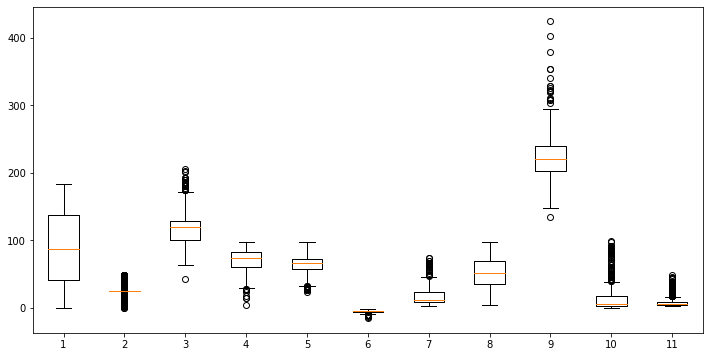

In [458]:
# Visulaizing the data before normalization
fig = plt.figure(figsize=(12,6))
plt.boxplot(spotify_features_x)
plt.show()

In [459]:
# normalizing spotify_features using min_max scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
spotify_features_scaled_x = spotify_features_x
spotify_features_scaled_x.loc[:,'bpm':'spch'] = scaler.fit_transform(spotify_features_x.loc[:,'bpm':'spch'])
spotify_features_scaled_x[0:2]

,artist,genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,174,46,0.331288,0.904255,0.594595,0.846154,0.083333,0.808511,0.286207,0.191919,0.022222
1,49,27,0.269939,0.946809,0.702703,0.769231,0.694444,0.638298,0.444828,0.242424,0.444444


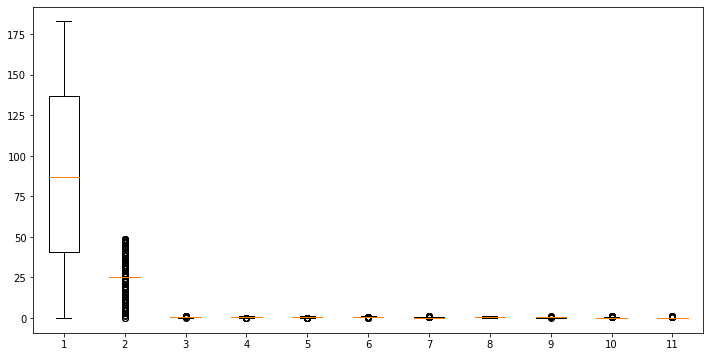

In [460]:
# after normalization of data using min_max scaler
# xticks_values = [0,'artist', 'genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'artist_type']
# print(len(xticks_values))
fig = plt.figure(figsize=(12,6))
plt.boxplot(spotify_features_scaled_x)
# plt.xticks(range(0,len(xticks_values)), xticks_values)
plt.show()


In [461]:
spotify_features_x_np = spotify_features_scaled_x.loc[:,:]
print(spotify_features_x_np[0:2])

   artist  genre       bpm      nrgy      dnce        dB      live       val  \
0     174     46  0.331288  0.904255  0.594595  0.846154  0.083333  0.808511   
1      49     27  0.269939  0.946809  0.702703  0.769231  0.694444  0.638298   

        dur     acous      spch  
0  0.286207  0.191919  0.022222  
1  0.444828  0.242424  0.444444  


In [462]:
spotify_features_y = np.where(spotify_features_y >= 74, 1, 0)
spotify_features_y[0:5]

array([1, 1, 1, 1, 1])

In [463]:
spotify_features_scaled_y = scaler.fit_transform(spotify_features_y.reshape(-1,1))
spotify_features_scaled_y[0:2]

spotify_features_y_np = spotify_features_y
spotify_features_y_np[0:5]

array([1, 1, 1, 1, 1])

In [464]:
print(spotify_features_x_np[0:2])
print(spotify_features_y_np[0:2])


   artist  genre       bpm      nrgy      dnce        dB      live       val  \
0     174     46  0.331288  0.904255  0.594595  0.846154  0.083333  0.808511   
1      49     27  0.269939  0.946809  0.702703  0.769231  0.694444  0.638298   

        dur     acous      spch  
0  0.286207  0.191919  0.022222  
1  0.444828  0.242424  0.444444  
[1 1]


In [480]:
from sklearn.model_selection import train_test_split
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(spotify_features_x_np, spotify_features_y_np, test_size=0.25, random_state=42)

In [481]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=6).fit(x_train_knn, y_train_knn)
n

KNeighborsClassifier(n_neighbors=6)

In [482]:
yhat_pred_knn = n.predict(x_test_knn)
print(yhat_pred_knn[0:20])
print(y_test_knn[0:20])

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0]
[1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0]


In [483]:
from sklearn import metrics
metrics.accuracy_score(y_test_knn, yhat_pred_knn)

0.7019867549668874

In [484]:
ks = 30
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_knn,y_train_knn)
    yhat = neigh.predict(x_test_knn)
    mean_acc[n-1] = metrics.accuracy_score(y_test_knn,yhat)
    std_acc[n-1] = np.std(yhat==y_test_knn)/np.sqrt(yhat.shape[0])
print(mean_acc)
print(np.where(mean_acc == np.max(mean_acc)))

[0.68874172 0.66225166 0.67549669 0.68211921 0.68874172 0.70198675
 0.66887417 0.68874172 0.66887417 0.64900662 0.66225166 0.65562914
 0.62913907 0.64900662 0.64900662 0.66225166 0.64238411 0.65562914
 0.66225166 0.64238411 0.64900662 0.62913907 0.62913907 0.62913907
 0.63576159 0.63576159 0.60927152 0.61589404 0.57615894]
(array([5]),)


In [470]:
cm_knn = confusion_matrix(y_test_knn, yhat_pred_knn)
print(cm_knn)

[[113  13]
 [ 53  20]]


In [471]:
print('Classification Report: \n', metrics.classification_report(y_test_knn, yhat_pred_knn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.90      0.77       126
           1       0.61      0.27      0.38        73

    accuracy                           0.67       199
   macro avg       0.64      0.59      0.58       199
weighted avg       0.65      0.67      0.63       199



In [472]:
error_rate = []
for i in range(1,40):
    Obj = KNeighborsClassifier(n_neighbors = i)
    Obj.fit(x_train_knn,y_train_knn)
    pred_i = Obj.predict(x_test_knn)
    error_rate.append(np.mean(pred_i != y_test_knn))


Text(0, 0.5, 'Error Rate')

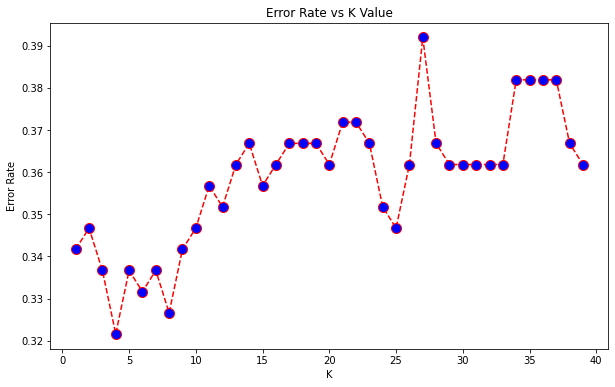

In [473]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [474]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, spotify_features_x_np, spotify_features_y_np, cv=10)
scores

array([0.63934426, 0.72131148, 0.7       , 0.73333333, 0.73333333,
       0.76666667, 0.75      , 0.63333333, 0.63333333, 0.61666667])

In [475]:
print('%.2f accuracy with a standard deviation of %.2f' % (np.mean(scores), np.std(scores)))

0.69 accuracy with a standard deviation of 0.05


In [476]:
from sklearn.model_selection import cross_val_predict
yhat_pred_knn_cross_val = cross_val_predict(knn, spotify_features_x_np, spotify_features_y_np, cv=10)

In [477]:
metrics.accuracy_score(spotify_features_y, yhat_pred_knn_cross_val)

0.6926910299003323

In [478]:
cm_cross_val_score = confusion_matrix(spotify_features_y, yhat_pred_knn_cross_val)
print(cm_cross_val_score)

[[345  57]
 [128  72]]


In [479]:
print('Classification Report: \n', metrics.classification_report(spotify_features_y, yhat_pred_knn_cross_val))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.86      0.79       402
           1       0.56      0.36      0.44       200

    accuracy                           0.69       602
   macro avg       0.64      0.61      0.61       602
weighted avg       0.67      0.69      0.67       602

